# Análise de Dados da Netflix 

Neste notebook, realizamos uma análise exploratória dos dados da Netflix com foco em:
- Duração média dos filmes por país
- Países com mais séries
- Gêneros mais frequentes por ano
- Crescimento de documentários

O objetivo é extrair insights relevantes a partir dos dados disponíveis usando bibliotecas como Pandas, Matplotlib e Seaborn.


2. Carregamento e limpeza dos dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
try:
    df = pd.read_csv("../data/netflix_titles.csv")
    print("✅ Dados carregados com sucesso.")
except FileNotFoundError:
    print("❌ Arquivo não encontrado. Verifique o caminho.")

# Conversão de datas
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year


✅ 3. Duração média dos filmes por país

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Ricar\AppData\Local\Temp\ipykernel_18780\3821122663.py:3: SyntaxWarning: invalid escape sequence '\d'
  df_movies['duration_minutes'] = df_movies['duration'].str.extract('(\d+)').astype(float)


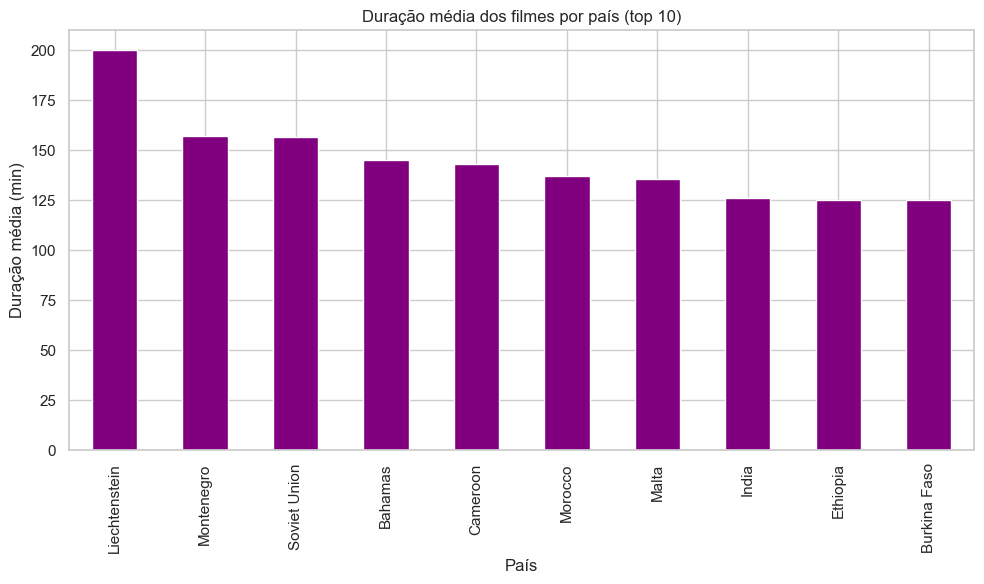

In [10]:
df_movies = df[df['type'] == 'Movie'].copy()
df_movies = df_movies.dropna(subset=['country', 'duration'])
df_movies['duration_minutes'] = df_movies['duration'].str.extract('(\d+)').astype(float)

# Separa paises que estão na mesma celula
df_movies['country'] = df_movies['country'].str.split(',')
df_movies = df_movies.explode('country')
df_movies['country'] = df_movies['country'].str.strip()

media_duracao_por_pais = df_movies.groupby('country')['duration_minutes'].mean().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(10,6))
media_duracao_por_pais.head(10).plot(kind='bar', color='purple')
plt.title('Duração média dos filmes por país (top 10)')
plt.xlabel('País')
plt.ylabel('Duração média (min)')
plt.tight_layout()
plt.show()


🧠 Conclusão: Alguns países como Liechtenstein e Montenegro aparecem com as maiores médias, mas com poucos filmes — o que pode distorcer a análise. É importante sempre considerar a quantidade de títulos envolvidos, Com isso, a proxima analise lista apenas paises que produziram pelo menos 10 filmes.

In [11]:
df_movies = df[df['type'] == 'Movie'].copy()
df_movies = df_movies.dropna(subset=['country', 'duration'])
df_movies['duration_minutes'] = df_movies['duration'].str.extract('(\d+)').astype(float)
df_movies['country'] = df_movies['country'].str.split(',')
df_movies = df_movies.explode('country')
df_movies['country'] = df_movies['country'].str.strip()
contagem_filmes = df_movies['country'].value_counts()
paises_validos = contagem_filmes[contagem_filmes >= 10].index
df_filtrado = df_movies[df_movies['country'].isin(paises_validos)]
media_duracao_filtrada = df_filtrado.groupby('country')['duration_minutes'].mean().sort_values(ascending=False)


<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Ricar\AppData\Local\Temp\ipykernel_18780\4094810335.py:3: SyntaxWarning: invalid escape sequence '\d'
  df_movies['duration_minutes'] = df_movies['duration'].str.extract('(\d+)').astype(float)


Grafico usando paises que produziram pelo menos 10 filmes 

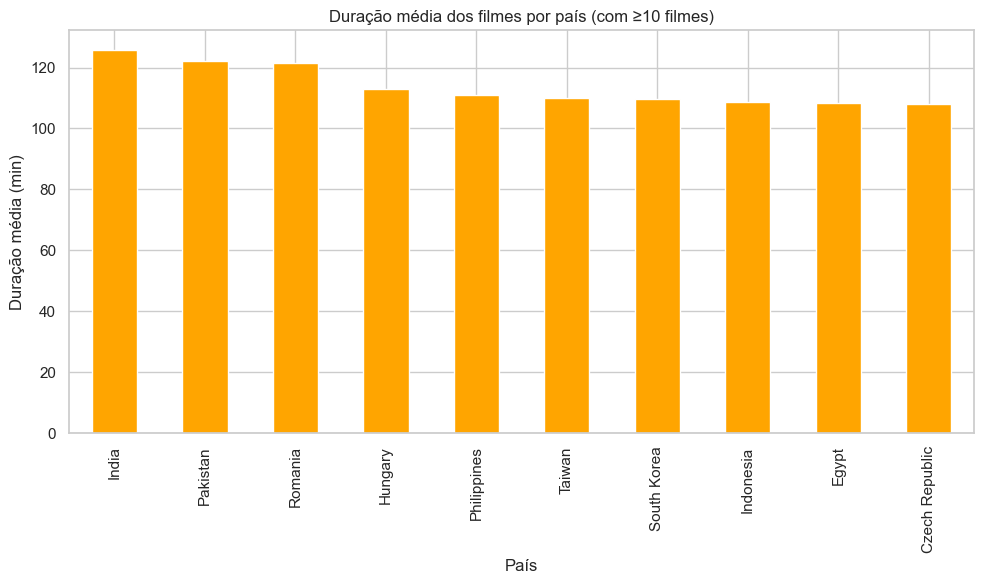

In [12]:
plt.figure(figsize=(10,6))
media_duracao_filtrada.head(10).plot(kind='bar', color='orange')
plt.title('Duração média dos filmes por país (com ≥10 filmes)')
plt.xlabel('País')
plt.ylabel('Duração média (min)')
plt.tight_layout()
plt.show()

Conclusão: Com essa formula, é possivel organizar melhor ao contabilizar apenas os países que produziram ao menos 10 filmes, garantimos uma média mais confiável e estatisticamente representativa, evitando distorções causadas por amostras muito pequenas.

4. Países com mais séries

C:\Users\Ricar\AppData\Local\Temp\ipykernel_18780\4026592006.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=series_por_pais.values, y=series_por_pais.index, palette='magma')


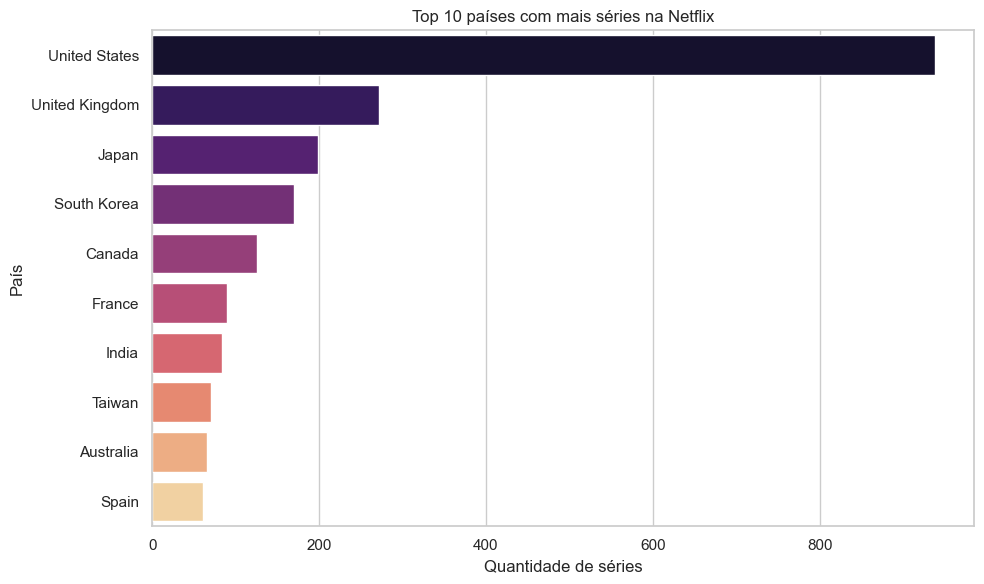

In [13]:
df_series = df[df['type'] == 'TV Show'].dropna(subset=['country']).copy()
df_series['country'] = df_series['country'].str.split(',')
df_series = df_series.explode('country')
df_series['country'] = df_series['country'].str.strip()

series_por_pais = df_series['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=series_por_pais.values, y=series_por_pais.index, palette='magma')
plt.title('Top 10 países com mais séries na Netflix')
plt.xlabel('Quantidade de séries')
plt.ylabel('País')
plt.tight_layout()
plt.show()


Conclusão: Os Estados Unidos dominam a produção de séries na Netflix, seguidos por Índia, Reino Unido e Japão — mostrando forte presença internacional.

5. Gêneros mais frequentes por ano

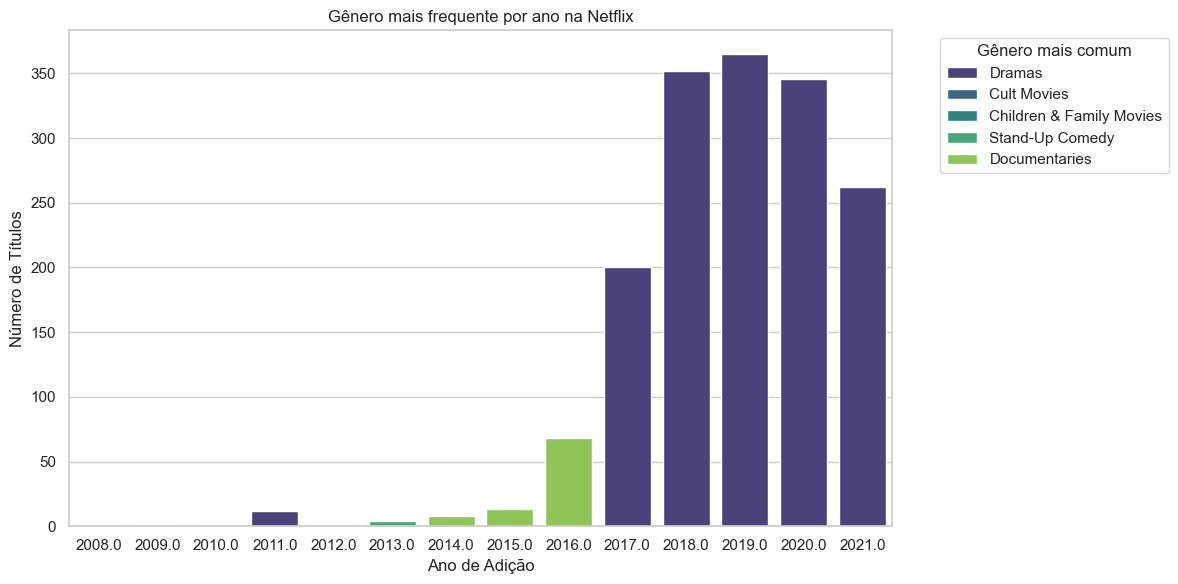

In [14]:
df['listed_in'] = df['listed_in'].fillna('')
df['main_genre'] = df['listed_in'].apply(lambda x: x.split(',')[0])
top_generos_por_ano = df.groupby(['year_added', 'main_genre']).size().reset_index(name='count')
top_generos_por_ano = top_generos_por_ano.sort_values(['year_added', 'count'], ascending=[True, False]).drop_duplicates(['year_added'])

plt.figure(figsize=(12,6))
sns.barplot(data=top_generos_por_ano, x='year_added', y='count', hue='main_genre', dodge=False, palette='viridis')
plt.title('Gênero mais frequente por ano na Netflix')
plt.xlabel('Ano de Adição')
plt.ylabel('Número de Títulos')
plt.legend(title='Gênero mais comum', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


Conclusão: Podemos observar mudanças nos gêneros dominantes ao longo dos anos, refletindo tendências culturais e decisões estratégicas da plataforma.

6. Crescimento de documentários nos últimos anos

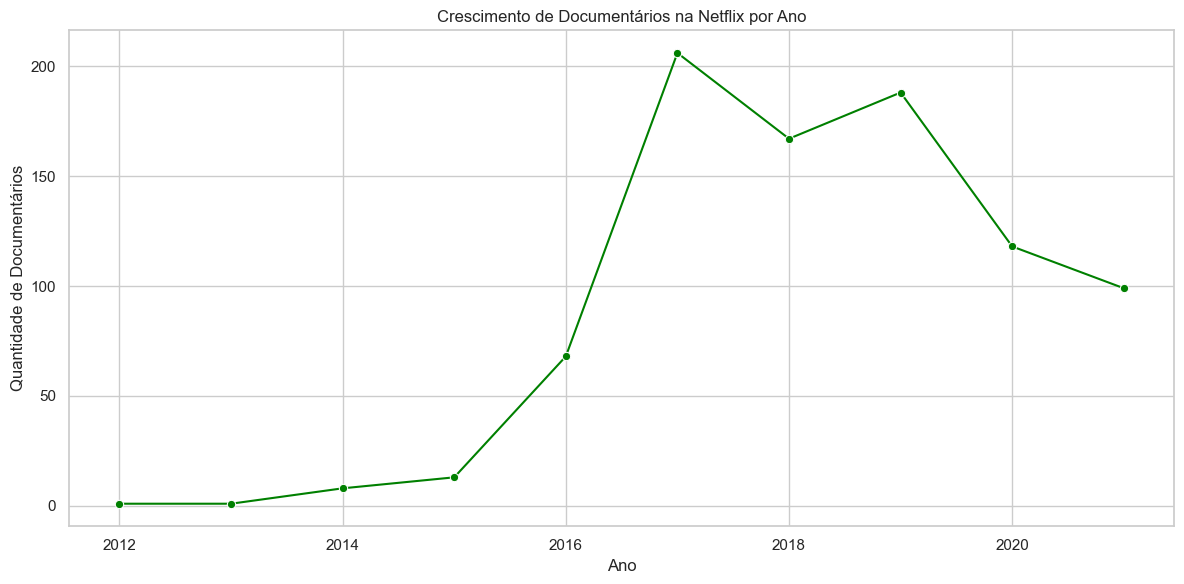

In [15]:
df_docs = df[df['listed_in'].str.contains('Documentaries', na=False)].copy()
df_docs['year_added'] = df_docs['date_added'].dt.year
docs_por_ano_df = df_docs['year_added'].value_counts().sort_index().reset_index()
docs_por_ano_df.columns = ['year', 'count']

plt.figure(figsize=(12,6))
sns.lineplot(data=docs_por_ano_df, x='year', y='count', marker='o', color='green')
plt.title('Crescimento de Documentários na Netflix por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Documentários')
plt.grid(True)
plt.tight_layout()
plt.show()


Conclusão: O gráfico mostra um aumento progressivo na adição de documentários, especialmente após 2015 — sinalizando que a empresa vem apostando cada vez mais nesse formato.

7. Conclusão geral

 Conclusões Gerais

- Os Estados Unidos continuam sendo o maior produtor de conteúdo na Netflix.
- Há uma boa diversidade de gêneros e países nos catálogos.
- Documentários vêm crescendo com o tempo, indicando maior interesse do público por esse tipo de conteúdo.
- A análise de dados permite identificar estratégias de negócios e tendências de consumo de forma objetiva.
